<a href="https://colab.research.google.com/github/MohammedKaleemullah/Employee-Data-Analytics/blob/main/Employee_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Connect to BigQuery

In [ ]:
from google.cloud import bigquery
from google.colab import auth

auth.authenticate_user()

project_id = 'employee-analysis-kaleem'
client = bigquery.Client(project=project_id)

#Get the Dataset and Table

In [ ]:
dataset_ref = client.dataset('Employee_Data', project=project_id)
dataset = client.get_dataset(dataset_ref)

table_ref = dataset.table('tbl_hr_data')
table = client.get_table(table_ref)

table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

In [ ]:
new_table_ref = dataset.table('tbl_new_employees')
new_table = client.get_table(new_table_ref)

new_table.schema

[SchemaField('satisfaction_level', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('last_evaluation', 'FLOAT', 'NULLABLE', None, None, (), None),
 SchemaField('number_project', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('average_montly_hours', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('time_spend_company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Work_accident', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Quit_the_Company', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('promotion_last_5years', 'INTEGER', 'NULLABLE', None, None, (), None),
 SchemaField('Departments', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('salary', 'STRING', 'NULLABLE', None, None, (), None),
 SchemaField('employee_id', 'STRING', 'NULLABLE', None, None, (), None)]

#Convert to DataFrame

In [ ]:
df = client.list_rows(table, selected_fields=table.schema).to_dataframe()
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.36,0.56,2,132,3,0,1,0,IT,medium,EMP00064
1,0.74,0.99,2,277,3,0,1,0,IT,medium,EMP00071
2,0.45,0.53,2,155,3,0,1,0,IT,low,EMP00142
3,0.40,0.53,2,151,3,0,1,0,IT,low,EMP00215
4,0.36,0.51,2,155,3,0,1,0,IT,low,EMP00216


In [ ]:
new_df = client.list_rows(new_table, selected_fields=new_table.schema).to_dataframe()
new_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,Quit_the_Company,promotion_last_5years,Departments,salary,employee_id
0,0.331690,0.847953,6,151,4,0,0,0,IT,low,NE15014
1,0.468434,0.169659,5,303,4,0,0,0,IT,low,NE15015
2,0.858448,0.918311,4,162,6,1,0,0,IT,low,NE15064
3,0.056211,0.322600,2,229,5,1,0,0,IT,low,NE15086
4,0.382648,0.434348,4,260,3,1,0,0,hr,low,NE15021


#Build the Model

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.9 MB/

In [ ]:
from pycaret.classification import *

In [ ]:
setup(df,target = 'Quit_the_Company',
      session_id = 89,
      ignore_features = ['employee_id'],
      categorical_features = ['Departments', 'salary'])

,Description,Value
0,Session id,89
1,Target,Quit_the_Company
2,Target type,Binary
3,Original data shape,"(15004, 11)"
4,Transformed data shape,"(15004, 21)"
5,Transformed train set shape,"(10502, 21)"
6,Transformed test set shape,"(4502, 21)"
7,Ignore features,1
8,Numeric features,7
9,Categorical features,2


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9894,0.9927,0.9648,0.9906,0.9775,0.9706,0.9708,1.1540
xgboost,Extreme Gradient Boosting,0.9865,0.9929,0.9604,0.9826,0.9713,0.9624,0.9626,0.2700
lightgbm,Light Gradient Boosting Machine,0.9856,0.9943,0.9525,0.9868,0.9692,0.9599,0.9602,1.0750
et,Extra Trees Classifier,0.9848,0.9925,0.9545,0.9811,0.9676,0.9576,0.9578,1.0060
gbc,Gradient Boosting Classifier,0.9748,0.9872,0.9265,0.9663,0.9459,0.9295,0.9299,1.4030
dt,Decision Tree Classifier,0.9735,0.9701,0.9636,0.9282,0.9455,0.9280,0.9284,0.1730
ada,Ada Boost Classifier,0.9578,0.9810,0.9049,0.9171,0.9108,0.8832,0.8834,0.4890
knn,K Neighbors Classifier,0.9343,0.9690,0.9165,0.8272,0.8694,0.8257,0.8278,0.3710
qda,Quadratic Discriminant Analysis,0.8392,0.8860,0.8126,0.6404,0.7111,0.6039,0.6163,0.1430
lr,Logistic Regression,0.7895,0.8191,0.3400,0.6040,0.4341,0.3173,0.3374,1.3050


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=89, verbose=0,
                       warm_start=False)

In [ ]:
rf_model = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9895,0.9933,0.9641,0.9918,0.9778,0.9709,0.9711
1,0.9905,0.9950,0.9641,0.9959,0.9798,0.9735,0.9738
2,0.9914,0.9875,0.9720,0.9918,0.9818,0.9762,0.9763
3,0.9933,0.9945,0.9760,0.9959,0.9859,0.9815,0.9816
4,0.9867,0.9933,0.9520,0.9917,0.9714,0.9627,0.9631
5,0.9867,0.9959,0.9560,0.9876,0.9715,0.9628,0.9631
6,0.9886,0.9941,0.9680,0.9837,0.9758,0.9683,0.9684
7,0.9933,0.9916,0.9800,0.9919,0.9859,0.9815,0.9816
8,0.9876,0.9953,0.9640,0.9837,0.9737,0.9656,0.9657


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
final_df = predict_model(rf_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9922,0.9942,0.9748,0.9924,0.9835,0.9785,0.9785


In [ ]:
final_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,Quit_the_Company,prediction_label,prediction_score
12221,0.70,0.74,5,255,2,0,0,technical,medium,0,0,0.98
9337,0.68,0.99,3,263,3,1,1,marketing,medium,0,0,0.99
9619,0.72,0.81,4,200,2,0,0,marketing,low,0,0,1.00
4542,0.50,0.91,3,240,3,0,0,sales,low,0,0,1.00
4574,0.77,0.87,4,242,6,0,0,sales,low,1,1,0.99


In [ ]:
new_prediction = predict_model(rf_model, data = new_df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9100,0,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
new_prediction.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,employee_id,Quit_the_Company,prediction_label,prediction_score
0,0.331690,0.847953,6,151,4,0,0,IT,low,NE15014,0,0,0.85
1,0.468434,0.169659,5,303,4,0,0,IT,low,NE15015,0,1,0.62
2,0.858448,0.918311,4,162,6,1,0,IT,low,NE15064,0,0,0.89
3,0.056211,0.322600,2,229,5,1,0,IT,low,NE15086,0,0,0.64
4,0.382648,0.434348,4,260,3,1,0,hr,low,NE15021,0,0,0.94


#Upload the data to Big Query

In [ ]:
new_prediction.to_gbq('Employee_Data.pilot_predictions',
                      project_id,
                      if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 6721.64it/s]


#Knowing the Features that were best for predictions

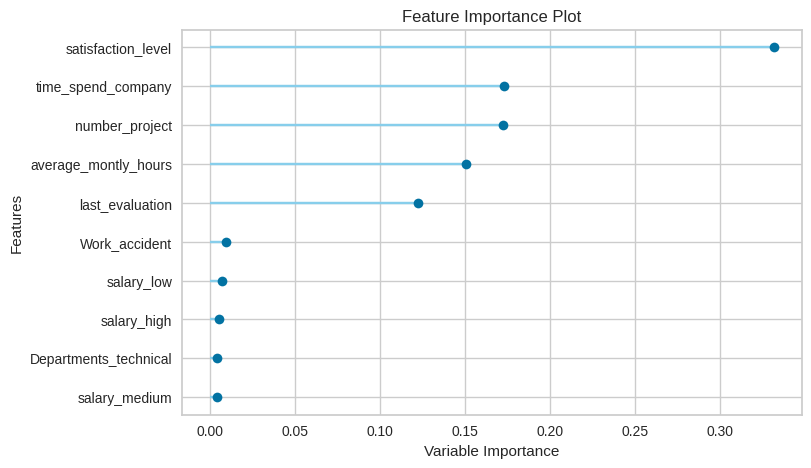

In [ ]:
plot_model(rf_model, plot = 'feature')

In [ ]:
rf_model.feature_names_in_

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments_accounting',
       'Departments_support', 'Departments_product_mng',
       'Departments_sales', 'Departments_technical', 'Departments_IT',
       'Departments_RandD', 'Departments_hr', 'Departments_marketing',
       'Departments_management', 'salary_medium', 'salary_low',
       'salary_high'], dtype=object)

In [ ]:
rf_model.feature_importances_

array([0.33171215, 0.12240972, 0.17234617, 0.15078328, 0.17321009,
       0.00938446, 0.0018015 , 0.00176831, 0.00307974, 0.00142063,
       0.00377895, 0.00384772, 0.00194176, 0.0013983 , 0.00162922,
       0.00129254, 0.00184147, 0.0038171 , 0.00729558, 0.00524132])

In [ ]:
import pandas as pd

feature_table = pd.DataFrame(zip(rf_model.feature_names_in_, rf_model.feature_importances_),
             columns = ['feature', 'importance'])

feature_table

,feature,importance
0,satisfaction_level,0.331712
1,last_evaluation,0.122410
2,number_project,0.172346
3,average_montly_hours,0.150783
4,time_spend_company,0.173210
5,Work_accident,0.009384
6,promotion_last_5years,0.001802
7,Departments_accounting,0.001768
8,Departments_support,0.003080
9,Departments_product_mng,0.001421


##Uploading into BigQuery

In [ ]:
feature_table.to_gbq('Employee_Data.feature_table',
                      project_id,
                     chunksize=None,
                      if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 1321.04it/s]
